# Exploratory Data Analysis

Let's run Exploratory Data Analysis on the [Penguins dataset](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data). The goal of this notebook is to understand the data and the problem we are trying to solve.

Let's start by loading the Penguins dataset and taking a look at the first few rows.

You'll see that the dataset contains the following columns:

1. `species`: The species of a penguin. This is the column we want to predict.
2. `island`: The island where the penguin was found
3. `culmen_length_mm`: The length of the penguin's culmen (bill) in millimeters
4. `culmen_depth_mm`: The depth of the penguin's culmen in millimeters
5. `flipper_length_mm`: The length of the penguin's flipper in millimeters
6. `body_mass_g`: The body mass of the penguin in grams
7. `sex`: The sex of the penguin

In [66]:
from pathlib import Path

import numpy as np
import pandas as pd

DATASET = Path("../data/penguins.csv")

penguins = pd.read_csv(DATASET)
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Now, let's get the summary statistics for the features in our dataset.


In [67]:
penguins.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


Let's now display the distribution of values for the three categorical columns in our data:

-   `species`: There are 3 species of penguins in the dataset: Adelie (with `152` samples), Gentoo (with `124` samples), and Chinstrap (with `68` samples).
-   `island`: Penguins come from 3 islands: Biscoe (`168` samples), Dream (`124` samples), and Torgersen (`52` samples).
-   `sex`: We have `168` male penguins, `165` female penguins, and `1` penguin with an ambiguous gender (`.`). We'll need to fix this later.


In [68]:
species_distribution = penguins["species"].value_counts()
island_distribution = penguins["island"].value_counts()
sex_distribution = penguins["sex"].value_counts()

print(species_distribution, end="\n\n")
print(island_distribution, end="\n\n")
print(sex_distribution)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64




Let's replace the ambiguous value in the `sex` column with a `null` value:


In [69]:
penguins["sex"] = penguins["sex"].replace(".", np.nan)

# Let's display the new distribution of the column:
sex_distribution = penguins["sex"].value_counts()
sex_distribution

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

Next, let's check for any missing values in the dataset.


In [70]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

----------------------------------------------------------------------
## ASSIGNMENT #1.3

### Detailed Missing Data Analysis 
Let's perform a more comprehensive analysis of missing values in the dataset before we impute them.

### Percentage of Missing Values
Let's calculate the percentage of missing values for each column to understand the extent of missing data:

In [71]:
# Calculate missing value statistics
missing_stats = pd.DataFrame({
    'Missing_Count': penguins.isna().sum(),
    'Missing_Percentage': (penguins.isna().sum() / len(penguins)) * 100
})

# Sort by percentage descending
missing_stats = missing_stats.sort_values('Missing_Percentage', ascending=False)
# missing_stats = missing_stats[missing_stats['Missing_Count'] > 0]

print("Missing Value Statistics:")
print(missing_stats)

Missing Value Statistics:
                   Missing_Count  Missing_Percentage
sex                           11            3.197674
culmen_length_mm               2            0.581395
culmen_depth_mm                2            0.581395
flipper_length_mm              2            0.581395
body_mass_g                    2            0.581395
species                        0            0.000000
island                         0            0.000000


## Detailed Missing Data Analysis
Let's perform a more comprehensive analysis of missing values in the dataset before we impute them.

### Percentage of Missing Values
Let's calculate the percentage of missing values for each column to understand the extent of missing data:

Missing Value Statistics:
                   Missing_Count  Missing_Percentage
sex                           11            3.197674
culmen_length_mm               2            0.581395
culmen_depth_mm                2            0.581395
flipper_length_mm              2            0.581395
body_mass_g                    2            0.581395


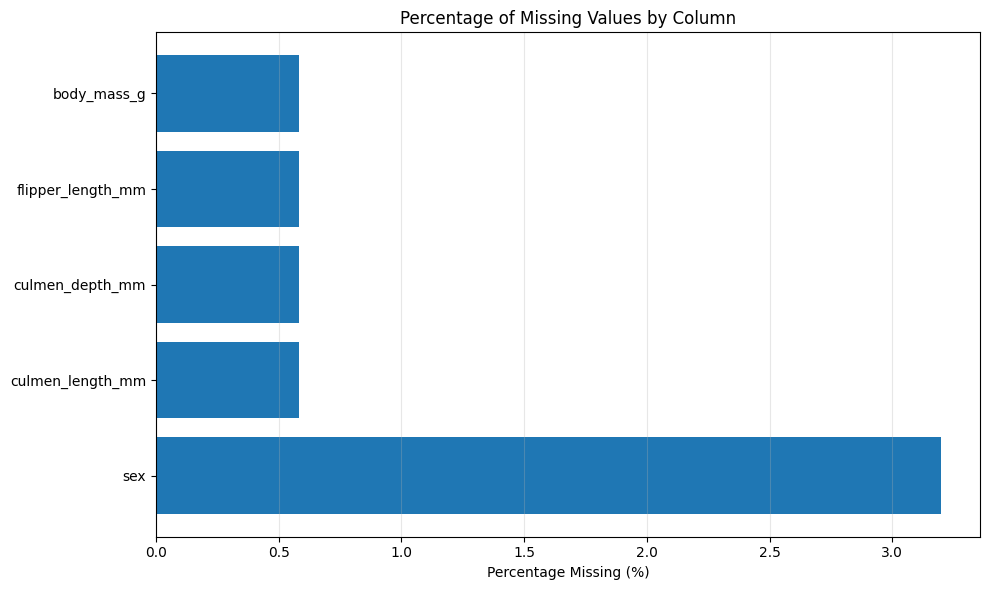

In [72]:
import matplotlib.pyplot as plt

# Calculate missing value statistics
missing_stats = pd.DataFrame({
    'Missing_Count': penguins.isna().sum(),
    'Missing_Percentage': (penguins.isna().sum() / len(penguins)) * 100
})

# Sort by percentage descending
missing_stats = missing_stats.sort_values('Missing_Percentage', ascending=False)
missing_stats = missing_stats[missing_stats['Missing_Count'] > 0]

print("Missing Value Statistics:")
print(missing_stats)

# Visualize missing percentages
if not missing_stats.empty:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(missing_stats.index, missing_stats['Missing_Percentage'])
    ax.set_xlabel('Percentage Missing (%)')
    ax.set_title('Percentage of Missing Values by Column')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

Insight: the missing values are concentrated mostly in the 'sex' column.

### Missing Data Patterns

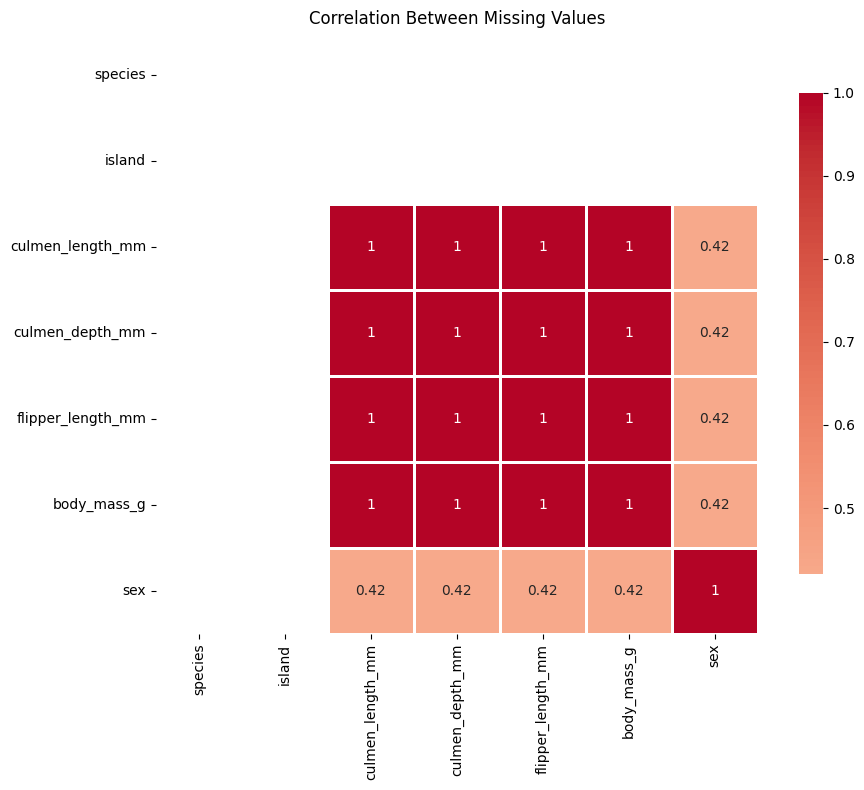


Missing Value Correlation Matrix:
                   species  island  culmen_length_mm  culmen_depth_mm  \
species                NaN     NaN               NaN              NaN   
island                 NaN     NaN               NaN              NaN   
culmen_length_mm       NaN     NaN          1.000000         1.000000   
culmen_depth_mm        NaN     NaN          1.000000         1.000000   
flipper_length_mm      NaN     NaN          1.000000         1.000000   
body_mass_g            NaN     NaN          1.000000         1.000000   
sex                    NaN     NaN          0.420753         0.420753   

                   flipper_length_mm  body_mass_g       sex  
species                          NaN          NaN       NaN  
island                           NaN          NaN       NaN  
culmen_length_mm            1.000000     1.000000  0.420753  
culmen_depth_mm             1.000000     1.000000  0.420753  
flipper_length_mm           1.000000     1.000000  0.420753  
body_mas

In [73]:
# Let's analyze patterns in missing data to see if certain features tend to be missing together:
import seaborn as sns

# Create a missing data matrix
missing_matrix = penguins.isna().astype(int)

# Calculate correlation between missing values
missing_corr = missing_matrix.corr()

# Only show correlations if there are missing values
if missing_matrix.sum().sum() > 0:
    # Create heatmap of missing value correlations
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    ax.set_title('Correlation Between Missing Values')
    plt.tight_layout()
    plt.show()
    
    print("\nMissing Value Correlation Matrix:")
    print(missing_corr)
else:
    print("No missing values to analyze patterns.")

### Missing Data Visualization
Let's create a visual representation of where missing values occur in the dataset:

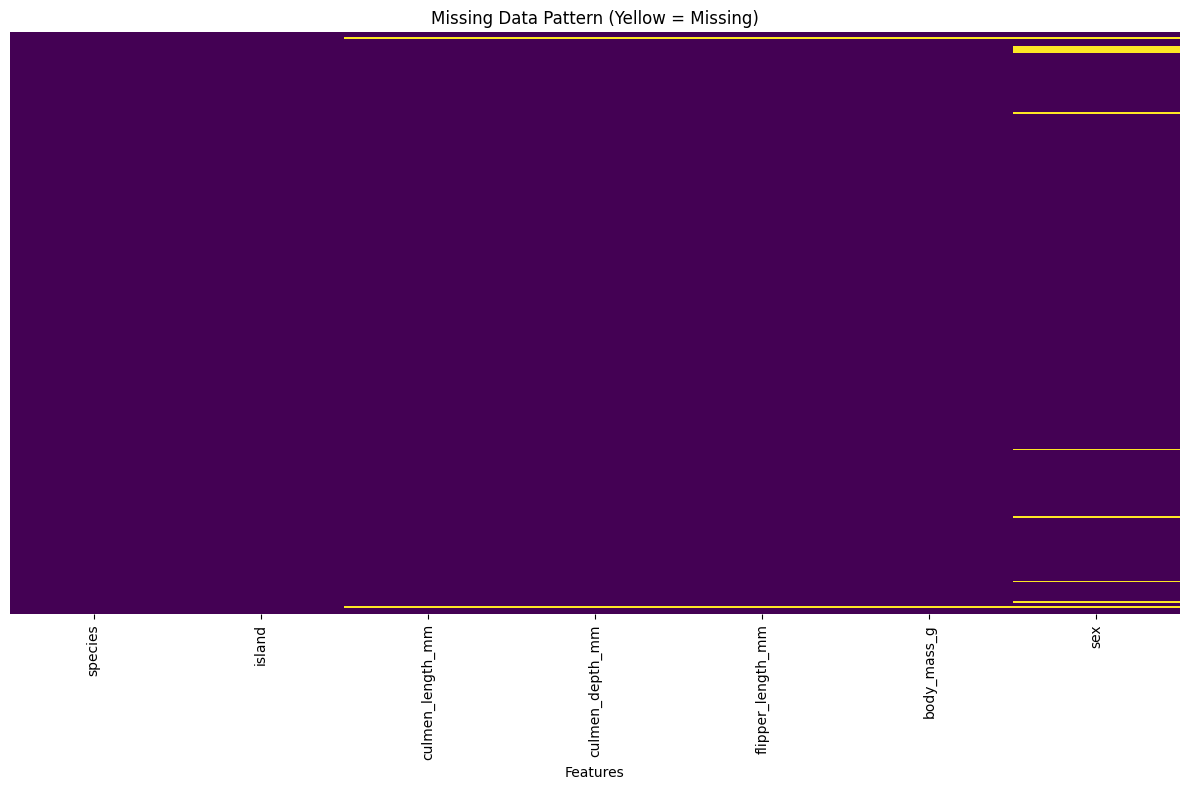

In [74]:
# Create a missing data heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Create matrix where True = missing, False = present
missing_data_matrix = penguins.isna()

# Plot heatmap
sns.heatmap(missing_data_matrix, cbar=False, yticklabels=False, 
            cmap='viridis', ax=ax)
ax.set_title('Missing Data Pattern (Yellow = Missing)')
ax.set_xlabel('Features')
plt.tight_layout()
plt.show()

Conclusion: there's high correlation between all numerical fields, meaning that when one misses for a row the other fields tend to be missing too. The only exception is 'sex', which seems to have mid-correlation with other fields. 'sex' misses everytime that other numerical features miss, but also miss in other scenarios, as a single-missing field. 

### Missing Data by Species
Let's investigate if missing data is related to specific species:

In [75]:
# Analyze missing values by species (before imputation)
print("Missing Values by Species:")
for species in unique_species:
    species_data = penguins[penguins['species'] == species]
    missing_by_species = species_data.isna().sum()
    missing_pct = (missing_by_species / len(species_data)) * 100
    
    print(f"\n{species}:")
    print(f"  Total samples: {len(species_data)}")
    for col in missing_by_species[missing_by_species > 0].index:
        print(f"  {col}: {missing_by_species[col]} ({missing_pct[col]:.1f}%)")

Missing Values by Species:

Adelie:
  Total samples: 152
  culmen_length_mm: 1 (0.7%)
  culmen_depth_mm: 1 (0.7%)
  flipper_length_mm: 1 (0.7%)
  body_mass_g: 1 (0.7%)
  sex: 6 (3.9%)

Chinstrap:
  Total samples: 68

Gentoo:
  Total samples: 124
  culmen_length_mm: 1 (0.8%)
  culmen_depth_mm: 1 (0.8%)
  flipper_length_mm: 1 (0.8%)
  body_mass_g: 1 (0.8%)
  sex: 5 (4.0%)


'Chinstrap' is the species with less Null affectation. It has no rows with missing values. It's true that represents only 10-15% of the dataset (unbalanced), but still, the data collection for this species is very effective.

### Missing Data by Island
Let's check if missing data patterns differ across islands:


In [76]:
print("Missing Values by Island:")
for island in penguins['island'].unique():
    island_data = penguins[penguins['island'] == island]
    missing_by_island = island_data.isna().sum()
    missing_pct = (missing_by_island / len(island_data)) * 100
    
    print(f"\n{island}:")
    print(f"  Total samples: {len(island_data)}")
    for col in missing_by_island[missing_by_island > 0].index:
        print(f"  {col}: {missing_by_island[col]} ({missing_pct[col]:.1f}%)")



Missing Values by Island:

Torgersen:
  Total samples: 52
  culmen_length_mm: 1 (1.9%)
  culmen_depth_mm: 1 (1.9%)
  flipper_length_mm: 1 (1.9%)
  body_mass_g: 1 (1.9%)
  sex: 5 (9.6%)

Biscoe:
  Total samples: 168
  culmen_length_mm: 1 (0.6%)
  culmen_depth_mm: 1 (0.6%)
  flipper_length_mm: 1 (0.6%)
  body_mass_g: 1 (0.6%)
  sex: 5 (3.0%)

Dream:
  Total samples: 124
  sex: 1 (0.8%)


In terms of Islands, 'Dream' is the one with fewer missing data (only 0.8% of 'sex' rows), being 50% of the dataset. In contrast, 'Torgersen' is the Island with more missing values ('sex' up to 9.6% missing), while representing only 5-10% of the dataset.

### Summary of Missing Data Analysis
Let's create a comprehensive summary:

In [77]:
def summarize_missing_data(df):
    """Create a comprehensive summary of missing data"""
    total_cells = np.prod(df.shape)
    total_missing = df.isna().sum().sum()
    
    summary = {
        'Total Cells': total_cells,
        'Total Missing': total_missing,
        'Percentage Missing': (total_missing / total_cells) * 100,
        'Complete Rows': df.dropna().shape[0],
        'Rows with Missing': df.shape[0] - df.dropna().shape[0],
        'Complete Columns': df.columns[df.isna().sum() == 0].tolist()
    }
    
    return summary

summary = summarize_missing_data(penguins)

print("=" * 50)
print("MISSING DATA SUMMARY")
print("=" * 50)
for key, value in summary.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    elif isinstance(value, list):
        print(f"{key}: {', '.join(value) if value else 'None'}")
    else:
        print(f"{key}: {value}")
print("=" * 50)

MISSING DATA SUMMARY
Total Cells: 2408
Total Missing: 19
Percentage Missing: 0.79
Complete Rows: 333
Rows with Missing: 11
Complete Columns: species, island


Conclusion: clearly, 'species' and 'island' are the more robust columns, with no missing values across the dataset. These are candidates for dependant/target variables, as more likely the data capture starts with them. Other fields are more affected with missing data. But the affectation of Nulls is not too high overall (1-3%).

----------------------------------------------------------------------

Let's get rid of the missing values. For now, we are going to replace the missing values with the most frequent value in the column. Later, we'll use a different strategy to replace missing numeric values.


In [78]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
penguins.iloc[:, :] = imputer.fit_transform(penguins)

# Let's display again the number of missing values:
penguins.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Let's visualize the distribution of categorical features.


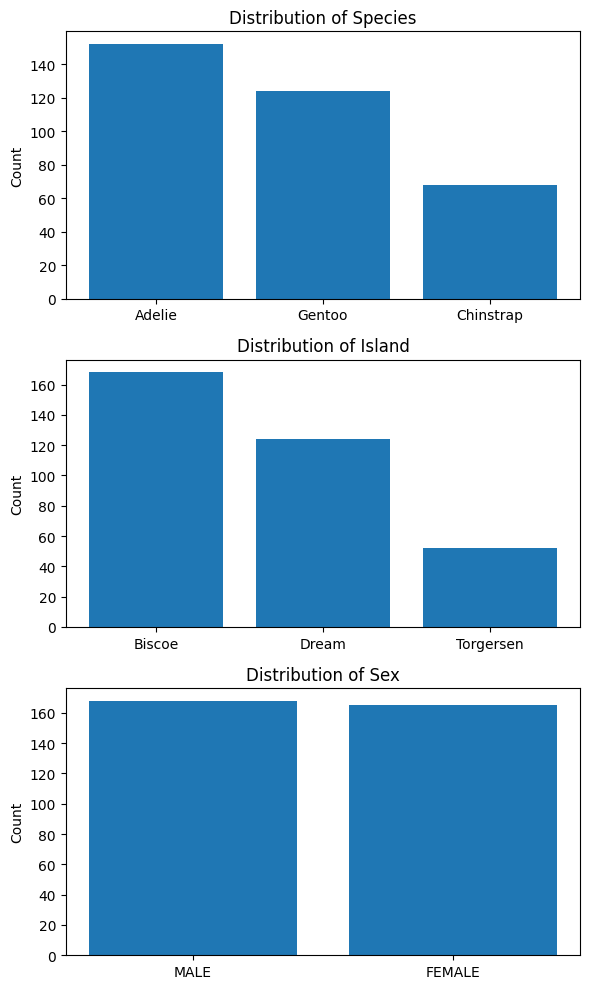

In [79]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].bar(species_distribution.index, species_distribution.values)
axs[0].set_ylabel("Count")
axs[0].set_title("Distribution of Species")

axs[1].bar(island_distribution.index, island_distribution.values)
axs[1].set_ylabel("Count")
axs[1].set_title("Distribution of Island")

axs[2].bar(sex_distribution.index, sex_distribution.values)
axs[2].set_ylabel("Count")
axs[2].set_title("Distribution of Sex")

plt.tight_layout()
plt.show()

Let's visualize the distribution of numerical columns.


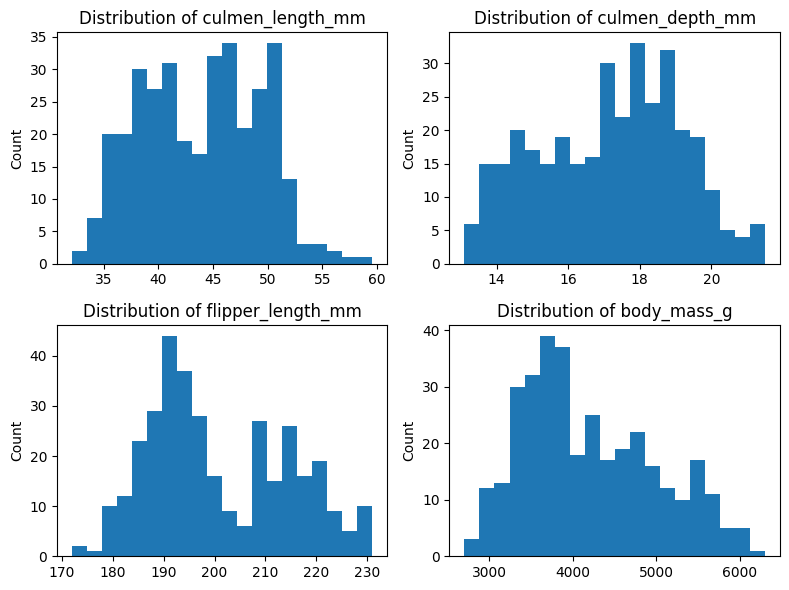

In [80]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0, 0].hist(penguins["culmen_length_mm"], bins=20)
axs[0, 0].set_ylabel("Count")
axs[0, 0].set_title("Distribution of culmen_length_mm")

axs[0, 1].hist(penguins["culmen_depth_mm"], bins=20)
axs[0, 1].set_ylabel("Count")
axs[0, 1].set_title("Distribution of culmen_depth_mm")

axs[1, 0].hist(penguins["flipper_length_mm"], bins=20)
axs[1, 0].set_ylabel("Count")
axs[1, 0].set_title("Distribution of flipper_length_mm")

axs[1, 1].hist(penguins["body_mass_g"], bins=20)
axs[1, 1].set_ylabel("Count")
axs[1, 1].set_title("Distribution of body_mass_g")

plt.tight_layout()
plt.show()

Let's display the covariance matrix of the dataset. The "covariance" measures how changes in one variable are associated with changes in a second variable. In other words, the covariance measures the degree to which two variables are linearly associated.

Here are three examples of what we get from interpreting the covariance matrix below:

1. The positive covariance of 50.26 between culmen length and flippler length suggests that larger values of culmen length are associated with larger values of flipper length. As one increases, generally so does the other.
2. The positive covariance of 2596.97 between culmen length and body mass suggests that heavier penguins generally have longer culmens. There is a tendency for these two variables to increase together.
3. The negative covariance of -742.66 between culmen depth and body mass suggests a general tendency that penguins with deeper culmens weigh less.


In [81]:
penguins.cov(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.679415,-2.516984,50.260588,2596.971151
culmen_depth_mm,-2.516984,3.877201,-16.108849,-742.660180
flipper_length_mm,50.260588,-16.108849,197.269501,9792.552037
body_mass_g,2596.971151,-742.660180,9792.552037,640316.716388


Let's now display the correlation matrix. "Correlation" measures both the strength and direction of the linear relationship between two variables:

Here are three examples of what we get from interpreting the correlation matrix below:

1. Penguins that weight more tend to have longer flippers.
2. Penguins with a shallower culmen tend to have longer flippers.
3. Penguins with longer culmens tend to have longer flippers.


In [82]:
penguins.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.234635,0.656856,0.595720
culmen_depth_mm,-0.234635,1.000000,-0.582472,-0.471339
flipper_length_mm,0.656856,-0.582472,1.000000,0.871302
body_mass_g,0.595720,-0.471339,0.871302,1.000000


Let's display the distribution of species by island:


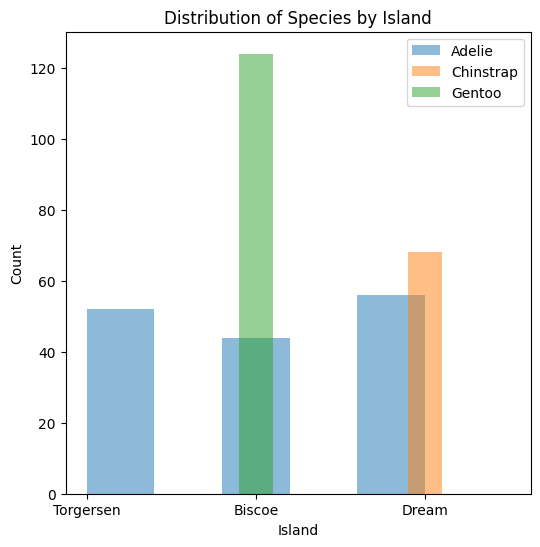

In [83]:
unique_species = penguins["species"].unique()

fig, ax = plt.subplots(figsize=(6, 6))
for species in unique_species:
    data = penguins[penguins["species"] == species]
    ax.hist(data["island"], bins=5, alpha=0.5, label=species)

ax.set_xlabel("Island")
ax.set_ylabel("Count")
ax.set_title("Distribution of Species by Island")
ax.legend()
plt.show()

Let's display the distribution of species by sex.


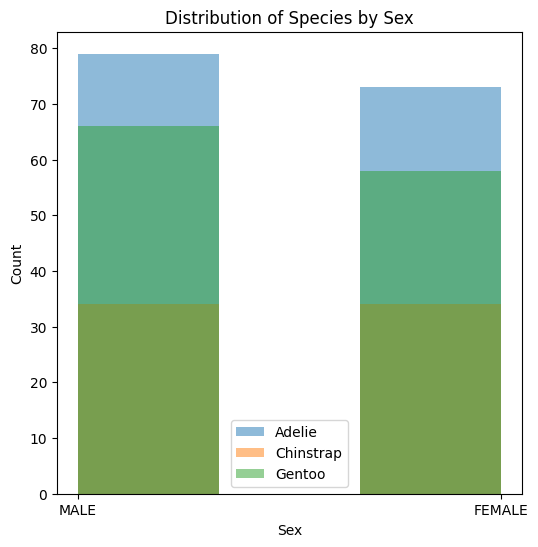

In [84]:
fig, ax = plt.subplots(figsize=(6, 6))

for species in unique_species:
    data = penguins[penguins["species"] == species]
    ax.hist(data["sex"], bins=3, alpha=0.5, label=species)

ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.set_title("Distribution of Species by Sex")

ax.legend()
plt.show()

----------------------------------------------------------------------

## ASSIGNMENT #1.4

### Advanced Numerical Feature Analysis
Let's perform a deeper analysis of the numerical features in our dataset, including multiple bin sizes, outlier detection, and species comparisons.

### Distribution Analysis with Different Bin Sizes
Let's visualize each numerical feature with different bin sizes to understand the distribution better:


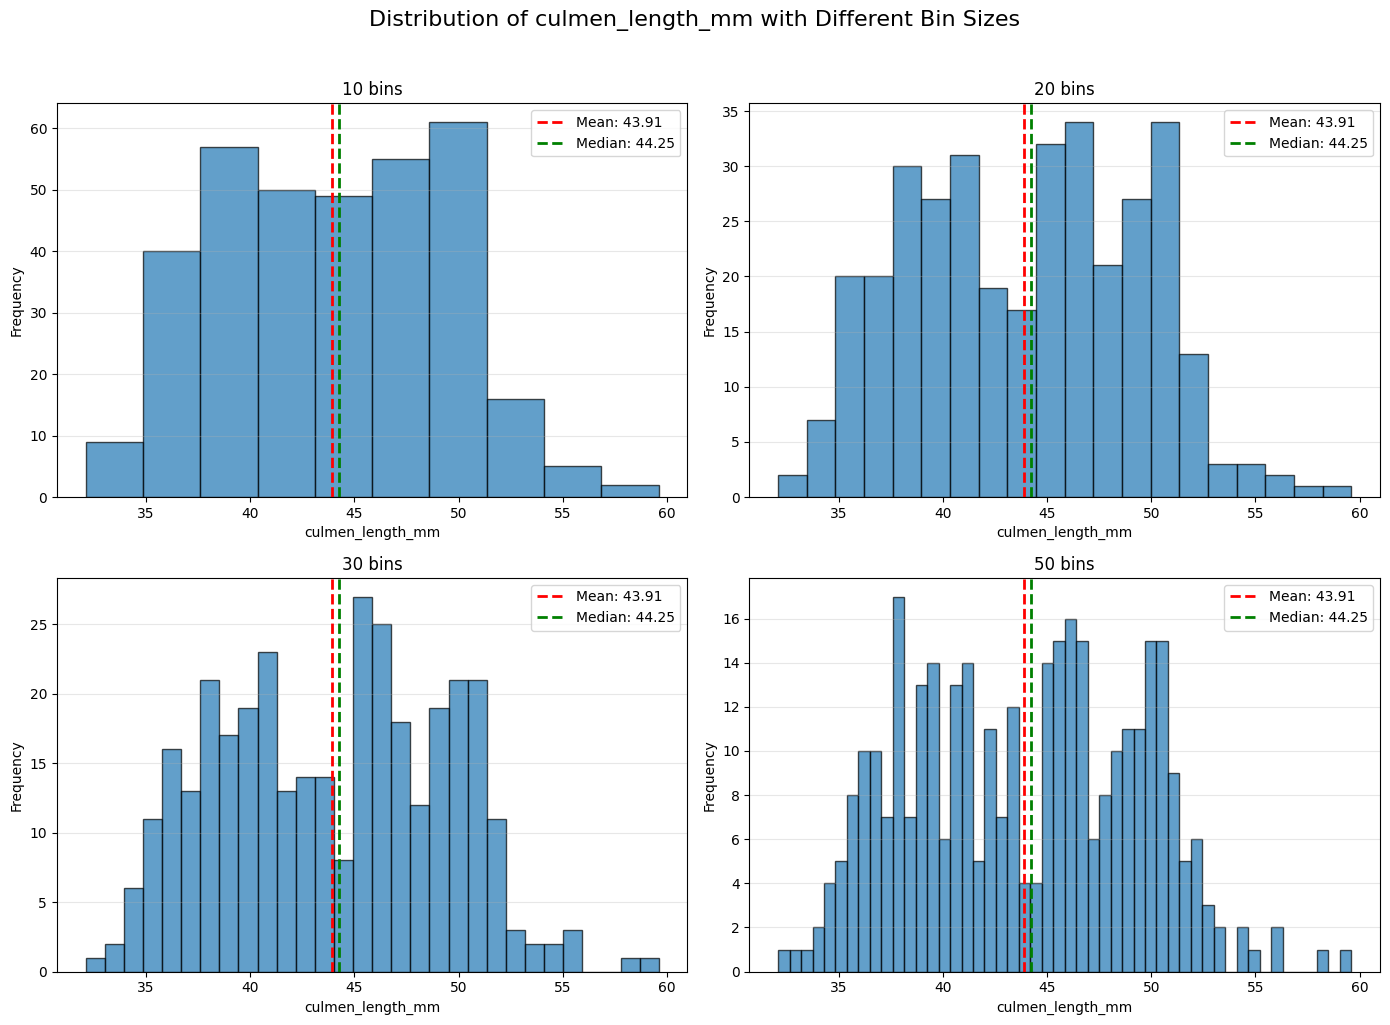

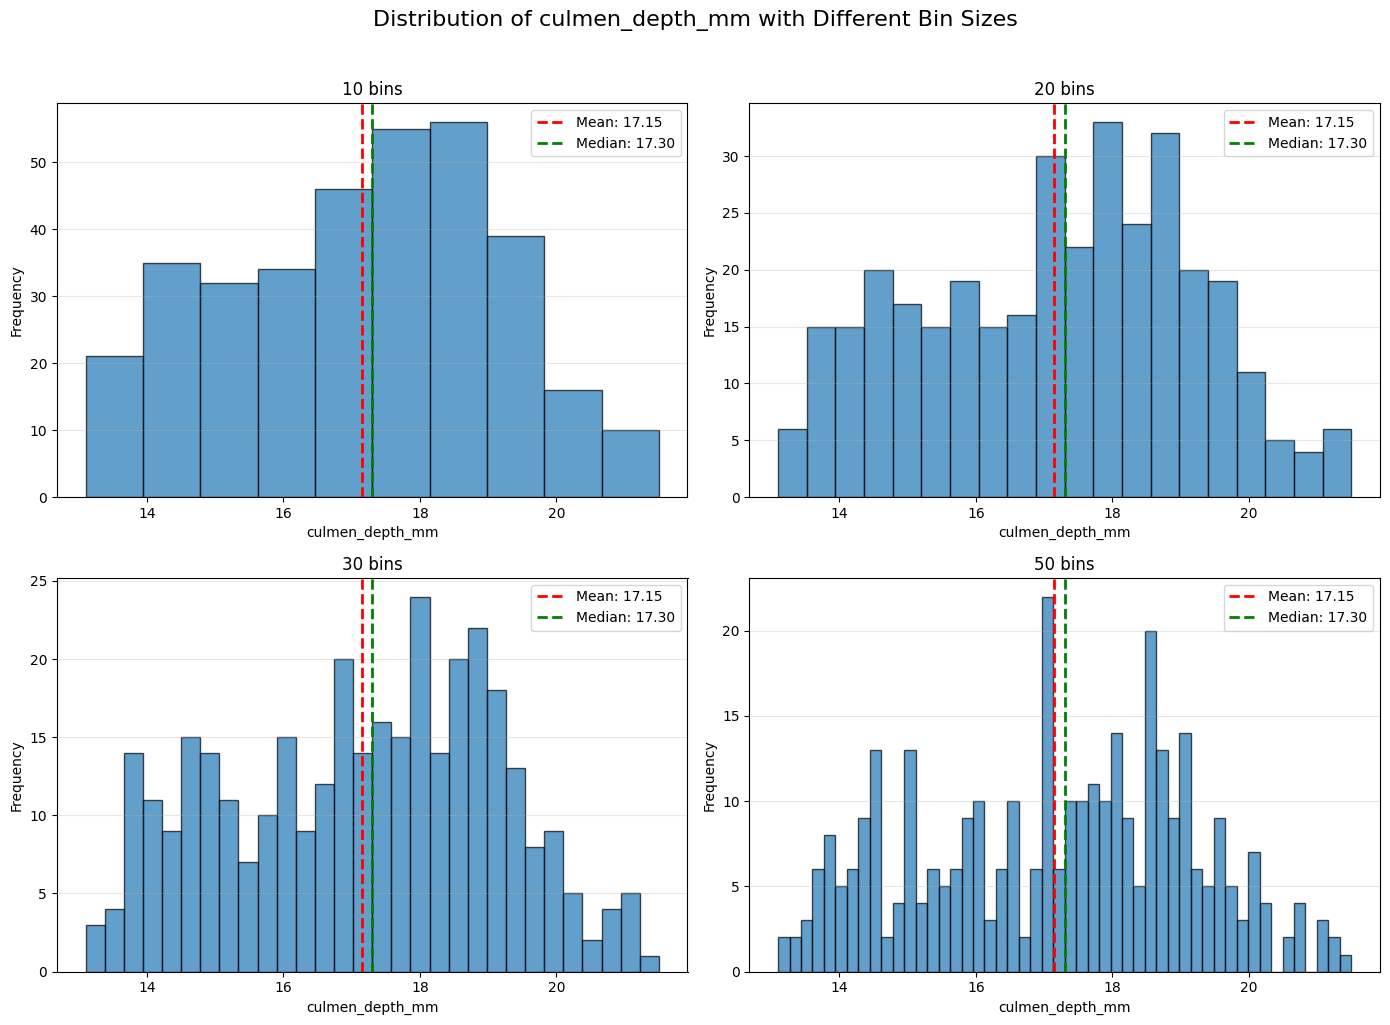

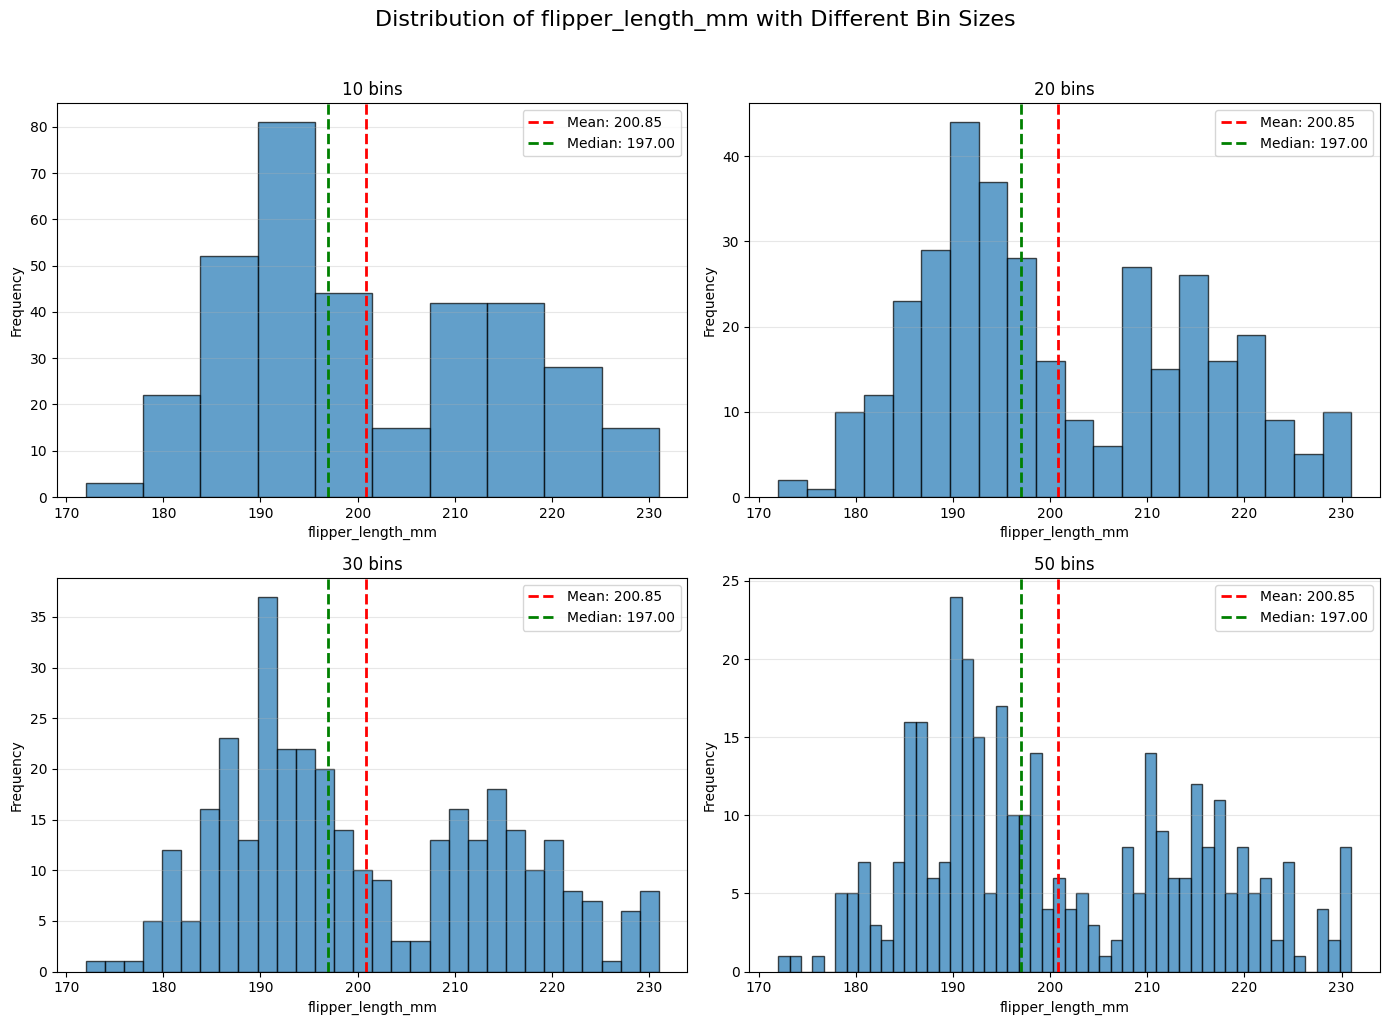

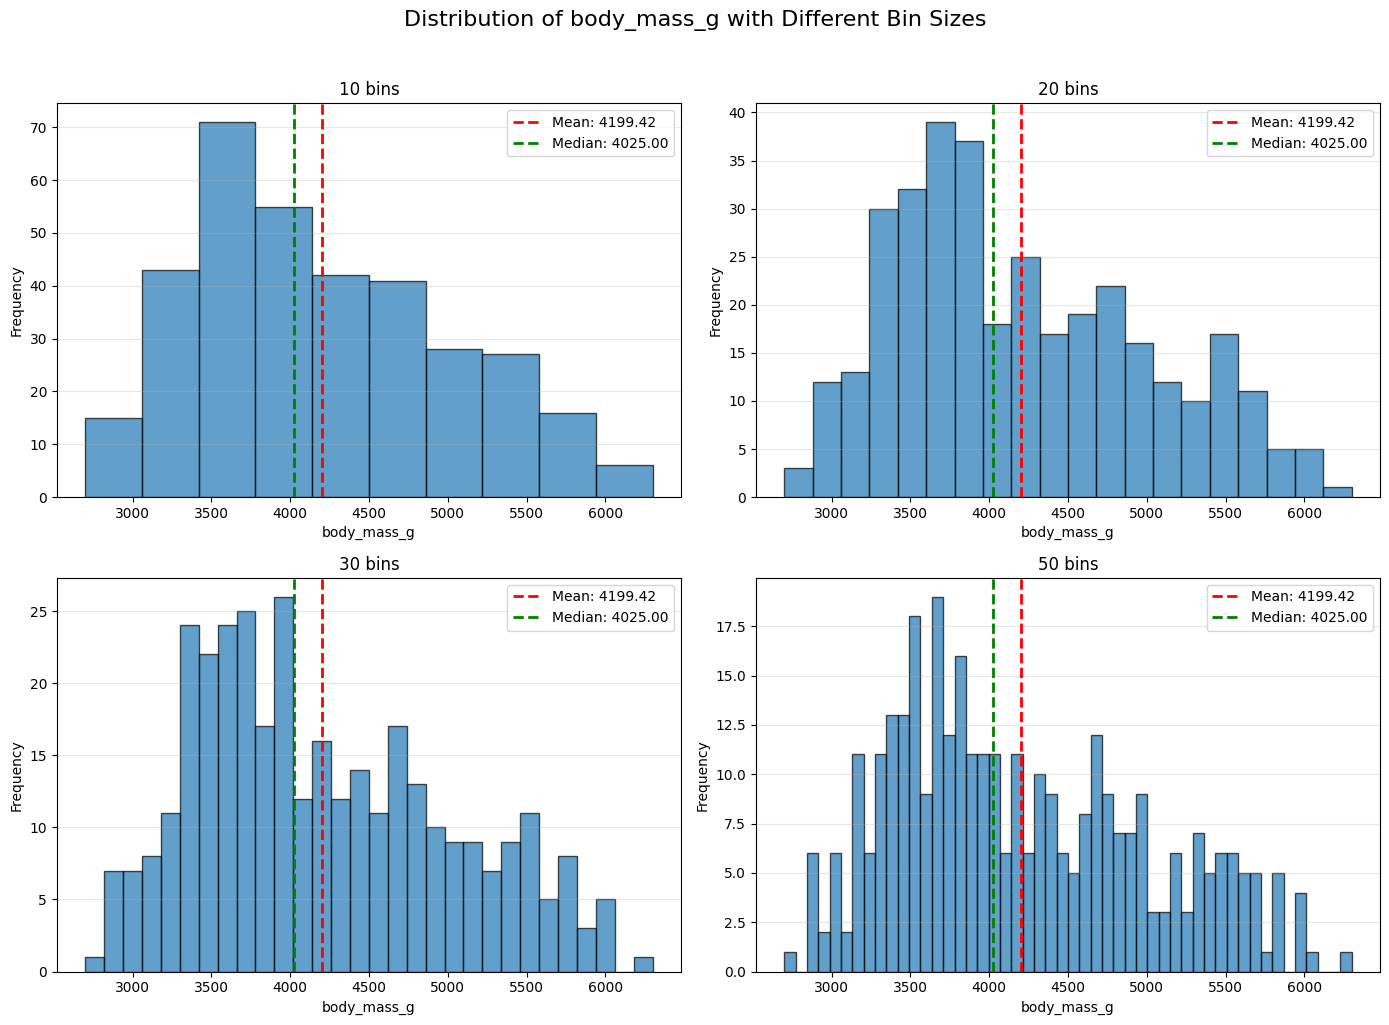

In [85]:
# Get numerical columns
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Different bin sizes to try
bin_sizes = [10, 20, 30, 50]

for col in numerical_cols:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Distribution of {col} with Different Bin Sizes', fontsize=16, y=1.02)
    
    for idx, bins in enumerate(bin_sizes):
        ax = axes[idx // 2, idx % 2]
        ax.hist(penguins[col], bins=bins, edgecolor='black', alpha=0.7)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_title(f'{bins} bins')
        ax.grid(axis='y', alpha=0.3)
        
        # Add mean and median lines
        mean_val = penguins[col].mean()
        median_val = penguins[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

Visually, the distirbutions of numeric fields (generally physical treats) are quite sparse. There's not a single concentration but 2 or 3 in general. This could give us the a preliminar idea that species are physically different, and so it's represented in the dataset.

### Outlier Detection Using Statistical Methods 
Let's identify potential outliers using multiple statistical methods: 
1. **IQR Method**: Values beyond 1.5 * IQR from Q1 and Q3
2. **Z-Score Method**: Values with |z-score| > 3
3. **Modified Z-Score**: Using median absolute deviation (MAD)

In [86]:
def detect_outliers_iqr(data, column):
    """Detect outliers using Interquartile Range method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score method"""
    mean = data[column].mean()
    std = data[column].std()
    
    z_scores = np.abs((data[column] - mean) / std)
    outliers = data[z_scores > threshold]
    
    return outliers, z_scores

def detect_outliers_modified_zscore(data, column, threshold=3.5):
    """Detect outliers using Modified Z-score (MAD) method"""
    median = data[column].median()
    mad = np.median(np.abs(data[column] - median))
    
    # Modified z-score
    modified_z_scores = 0.6745 * (data[column] - median) / mad if mad != 0 else 0
    outliers = data[np.abs(modified_z_scores) > threshold]
    
    return outliers, modified_z_scores

# Analyze outliers for each numerical column
print("=" * 80)
print("OUTLIER DETECTION SUMMARY")
print("=" * 80)

outlier_summary = {}

for col in numerical_cols:
    print(f"\n{col}:")
    print("-" * 80)
    
    # IQR Method
    iqr_outliers, lower, upper = detect_outliers_iqr(penguins, col)
    print(f"  IQR Method: {len(iqr_outliers)} outliers")
    print(f"    Range: [{lower:.2f}, {upper:.2f}]")
    
    # Z-Score Method
    zscore_outliers, z_scores = detect_outliers_zscore(penguins, col)
    print(f"  Z-Score Method (|z| > 3): {len(zscore_outliers)} outliers")
    
    # Modified Z-Score Method
    mad_outliers, mod_z_scores = detect_outliers_modified_zscore(penguins, col)
    print(f"  Modified Z-Score Method: {len(mad_outliers)} outliers")
    
    outlier_summary[col] = {
        'iqr': len(iqr_outliers),
        'zscore': len(zscore_outliers),
        'mad': len(mad_outliers)
    }

OUTLIER DETECTION SUMMARY

culmen_length_mm:
--------------------------------------------------------------------------------
  IQR Method: 0 outliers
    Range: [25.44, 62.34]
  Z-Score Method (|z| > 3): 0 outliers
  Modified Z-Score Method: 0 outliers

culmen_depth_mm:
--------------------------------------------------------------------------------
  IQR Method: 0 outliers
    Range: [10.95, 23.35]
  Z-Score Method (|z| > 3): 0 outliers
  Modified Z-Score Method: 0 outliers

flipper_length_mm:
--------------------------------------------------------------------------------
  IQR Method: 0 outliers
    Range: [155.50, 247.50]
  Z-Score Method (|z| > 3): 0 outliers
  Modified Z-Score Method: 0 outliers

body_mass_g:
--------------------------------------------------------------------------------
  IQR Method: 0 outliers
    Range: [1750.00, 6550.00]
  Z-Score Method (|z| > 3): 0 outliers
  Modified Z-Score Method: 0 outliers


### Visual Outlier Detection
Let's create box plots to visualize outliers in each numerical feature:

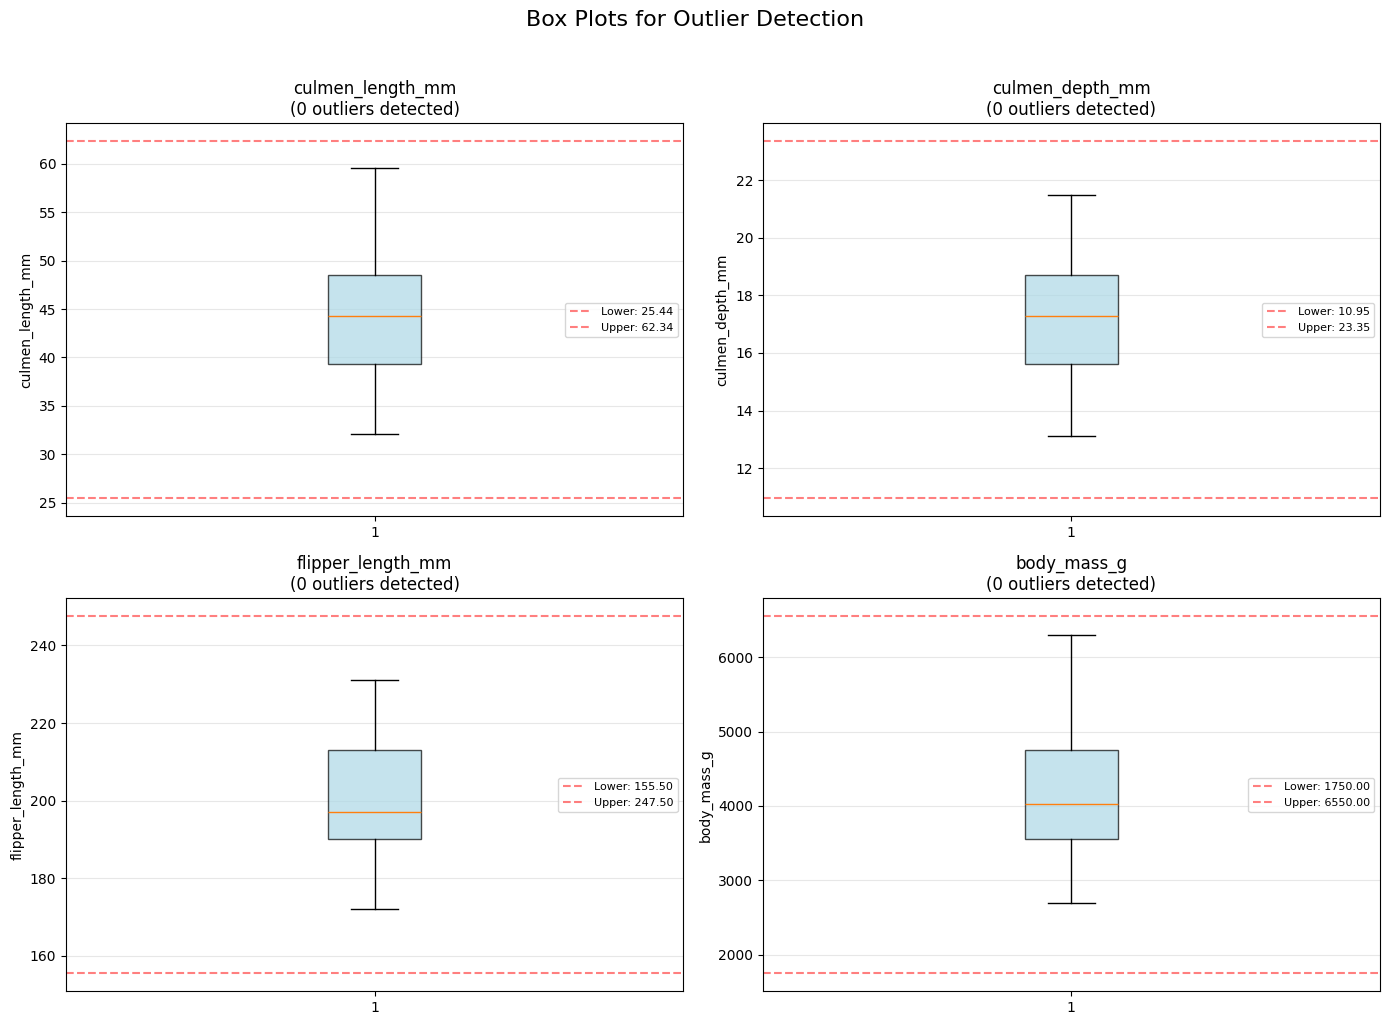

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16, y=1.02)

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 2, idx % 2]
    
    # Create box plot
    bp = ax.boxplot(penguins[col], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    # Highlight outliers
    outliers, lower, upper = detect_outliers_iqr(penguins, col)
    
    ax.set_ylabel(col)
    ax.set_title(f'{col}\n({len(outliers)} outliers detected)')
    ax.grid(axis='y', alpha=0.3)
    
    # Add reference lines for bounds
    ax.axhline(lower, color='red', linestyle='--', alpha=0.5, label=f'Lower: {lower:.2f}')
    ax.axhline(upper, color='red', linestyle='--', alpha=0.5, label=f'Upper: {upper:.2f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

Considering the fields being studied are physical treats, it's natural that there are no outliers from the analysis. Moreover, this means that data collection is robust, with no errors.

### Distribution Comparison Between Species
Let's compare how each numerical feature is distributed across different penguin species:

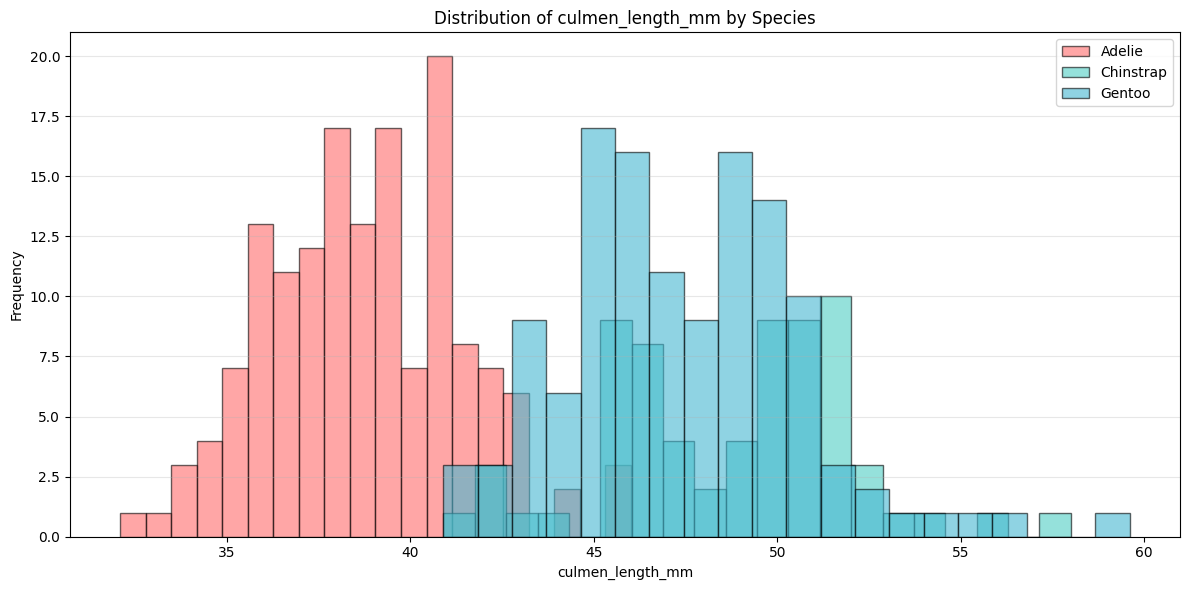

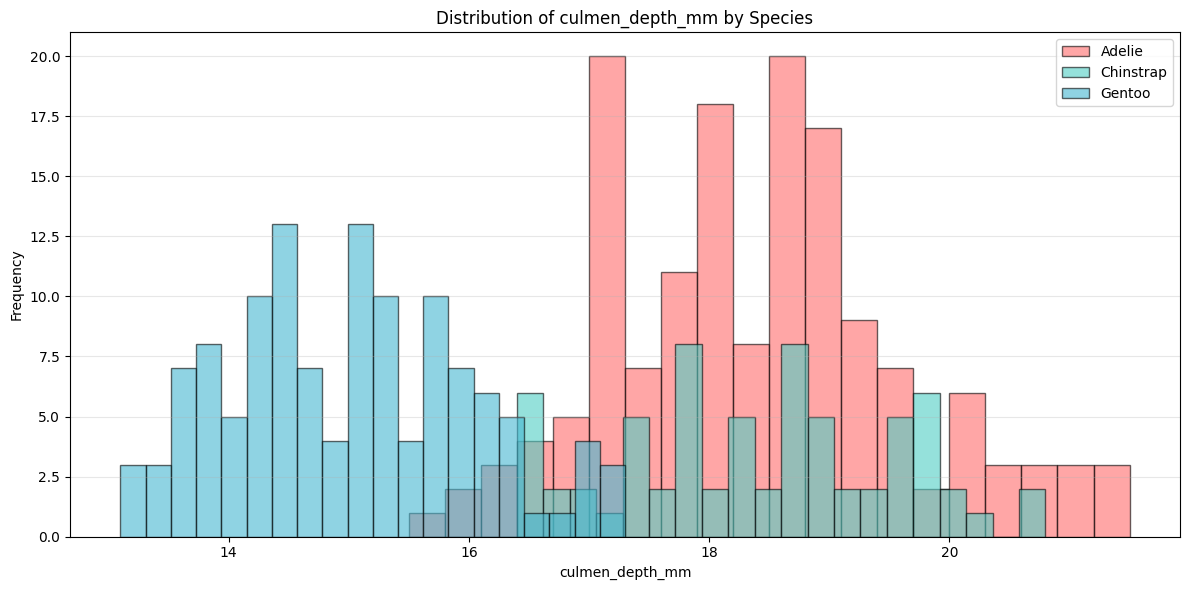

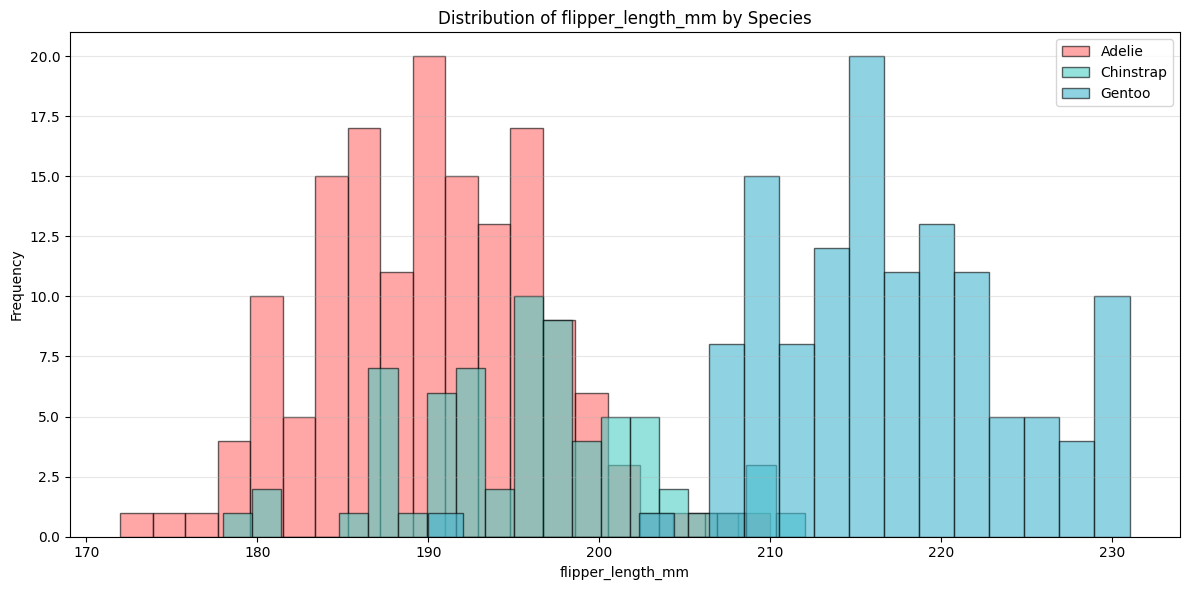

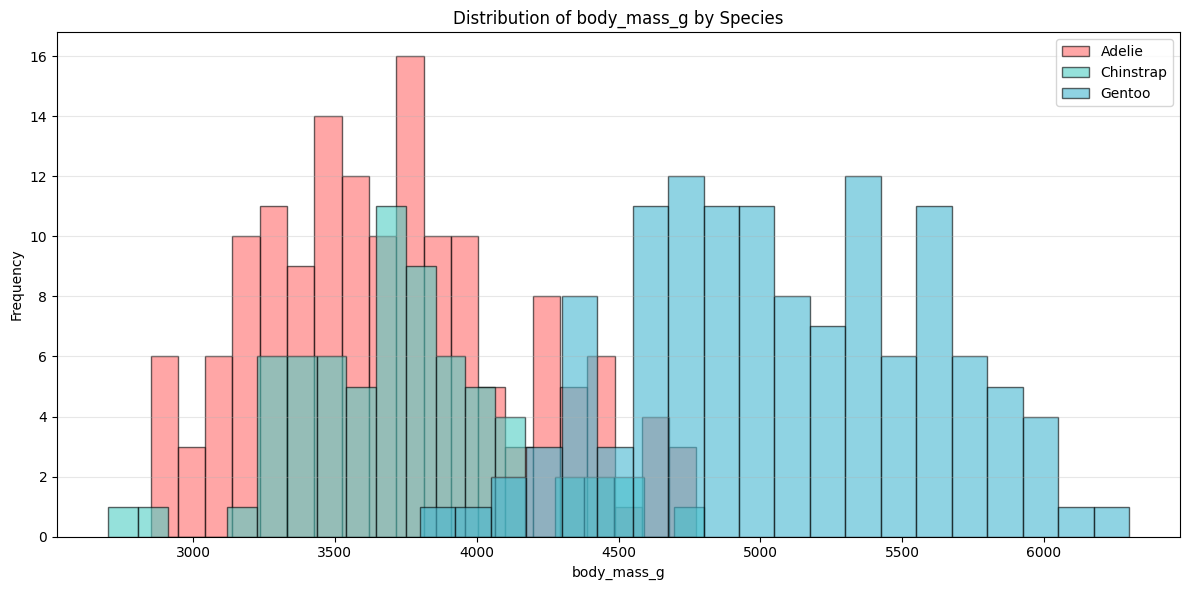

In [88]:
# Create overlapping histograms for each feature by species
for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    for idx, species in enumerate(unique_species):
        species_data = penguins[penguins['species'] == species][col]
        ax.hist(species_data, bins=20, alpha=0.6, label=species, 
                color=colors[idx], edgecolor='black')
    
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col} by Species')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

As suspected, the different concentrations shown in the distribution plots respond to different species.

### Statistical Comparison Between Species
Let's create a detailed statistical summary for each feature across species:

In [89]:
print("=" * 80)
print("STATISTICAL COMPARISON BY SPECIES")
print("=" * 80)

for col in numerical_cols:
    print(f"\n{col}:")
    print("-" * 80)
    
    stats_by_species = penguins.groupby('species')[col].agg([
        'count', 'mean', 'std', 'min', 
        ('25%', lambda x: x.quantile(0.25)),
        ('50%', lambda x: x.quantile(0.50)),
        ('75%', lambda x: x.quantile(0.75)),
        'max'
    ]).round(2)
    
    print(stats_by_species)

STATISTICAL COMPARISON BY SPECIES

culmen_length_mm:
--------------------------------------------------------------------------------
           count   mean   std   min    25%    50%    75%   max
species                                                       
Adelie       152  38.81  2.66  32.1  36.78  38.80  40.80  46.0
Chinstrap     68  48.83  3.34  40.9  46.35  49.55  51.08  58.0
Gentoo       124  47.45  3.12  40.9  45.28  47.25  49.52  59.6

culmen_depth_mm:
--------------------------------------------------------------------------------
           count   mean   std   min    25%    50%    75%   max
species                                                       
Adelie       152  18.34  1.22  15.5  17.48  18.40  19.00  21.5
Chinstrap     68  18.42  1.14  16.4  17.50  18.45  19.40  20.8
Gentoo       124  15.00  0.99  13.1  14.20  15.00  15.72  17.3

flipper_length_mm:
--------------------------------------------------------------------------------
           count    mean   std    mi

No remarkable statistics, aside from the unrepresented Chinstrap species, and that Gentoo have a high standard deviation in body mass, as different penguins of this species have a clear difference in body mass, despite measurements don't differ that much.

### Violin Plots for Species Comparison
Violin plots combine box plots with kernel density estimation to show the distribution shape:

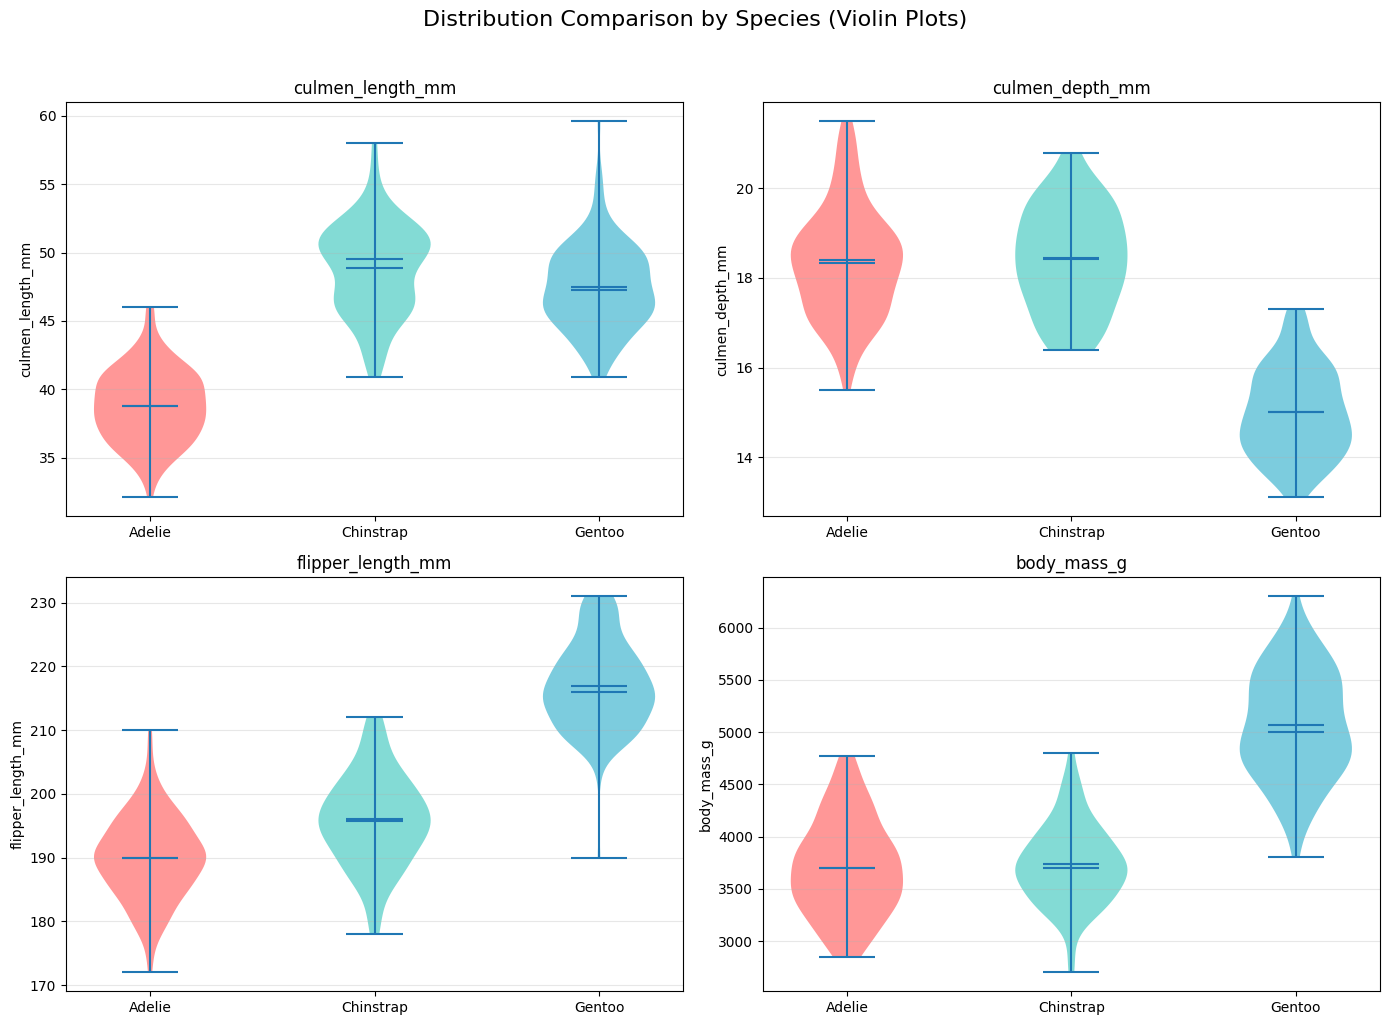

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution Comparison by Species (Violin Plots)', fontsize=16, y=1.02)

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 2, idx % 2]
    
    # Prepare data for violin plot
    species_data = [penguins[penguins['species'] == species][col].values 
                    for species in unique_species]
    
    # Create violin plot
    parts = ax.violinplot(species_data, positions=range(len(unique_species)), 
                          showmeans=True, showmedians=True)
    
    # Customize colors
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    ax.set_xticks(range(len(unique_species)))
    ax.set_xticklabels(unique_species)
    ax.set_ylabel(col)
    ax.set_title(col)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Box Plots by Species
Let's create side-by-side box plots for better comparison:

/tmp/ipykernel_1237/2101316428.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(species_data, labels=unique_species, patch_artist=True)
/tmp/ipykernel_1237/2101316428.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(species_data, labels=unique_species, patch_artist=True)
/tmp/ipykernel_1237/2101316428.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(species_data, labels=unique_species, patch_artist=True)
/tmp/ipykernel_1237/2101316428.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; 

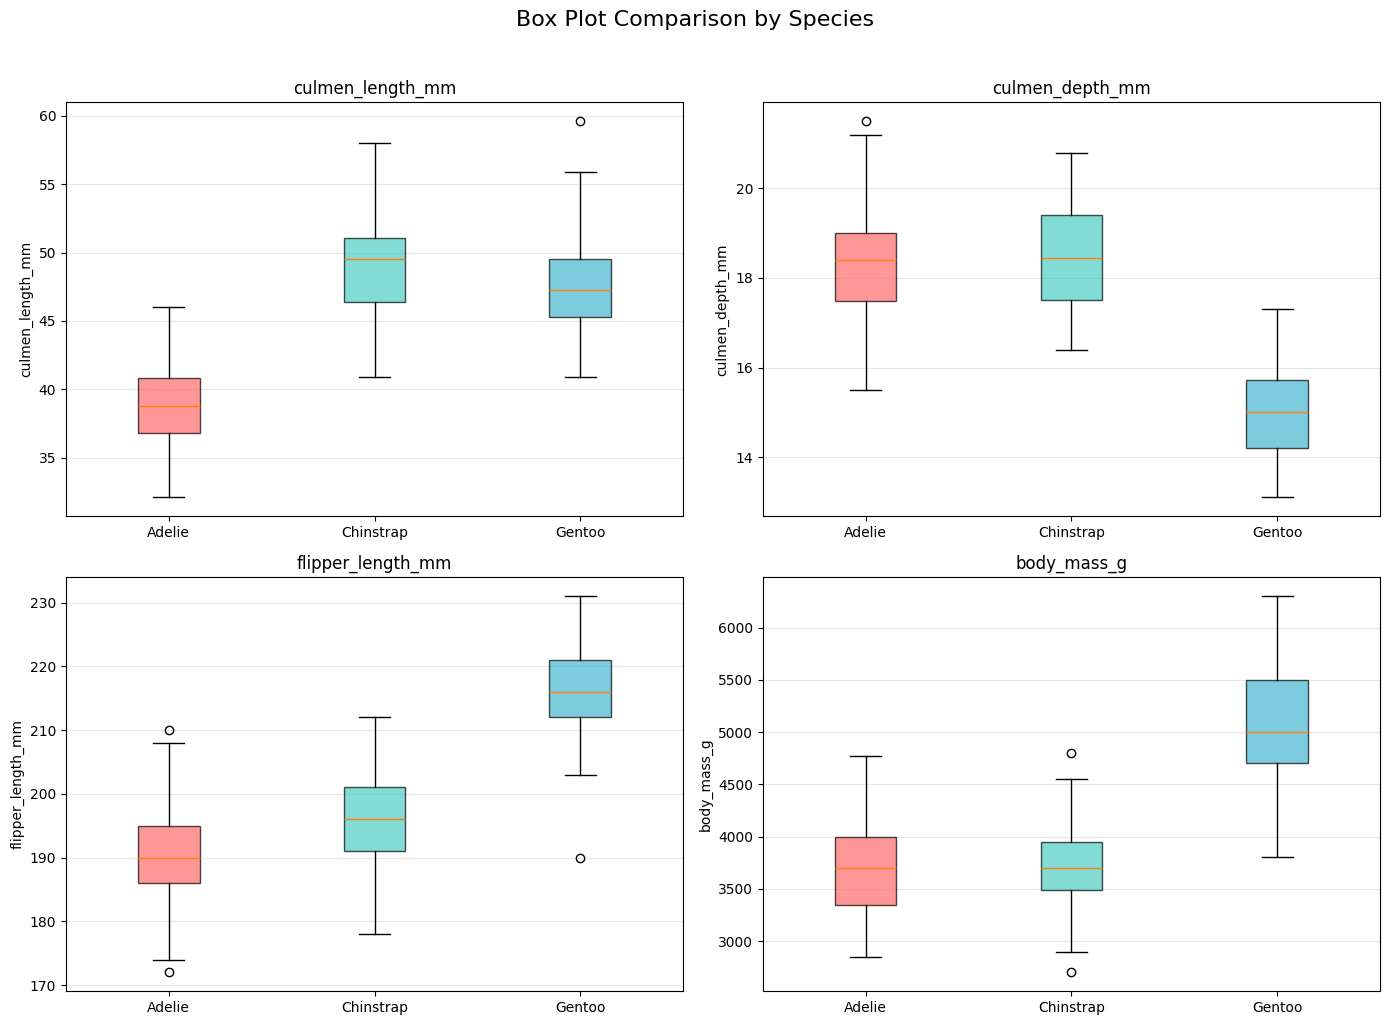

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Box Plot Comparison by Species', fontsize=16, y=1.02)

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 2, idx % 2]
    
    # Prepare data for box plot
    species_data = [penguins[penguins['species'] == species][col].values 
                    for species in unique_species]
    
    # Create box plot
    bp = ax.boxplot(species_data, labels=unique_species, patch_artist=True)
    
    # Color boxes
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel(col)
    ax.set_title(col)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

The clear difference of distributions per species sets for a optimistic scenario to train a ML model on this data, as categories can be clearly differentiated.

### Density Plots by Species
Let's create kernel density estimation plots for smooth distribution visualization:

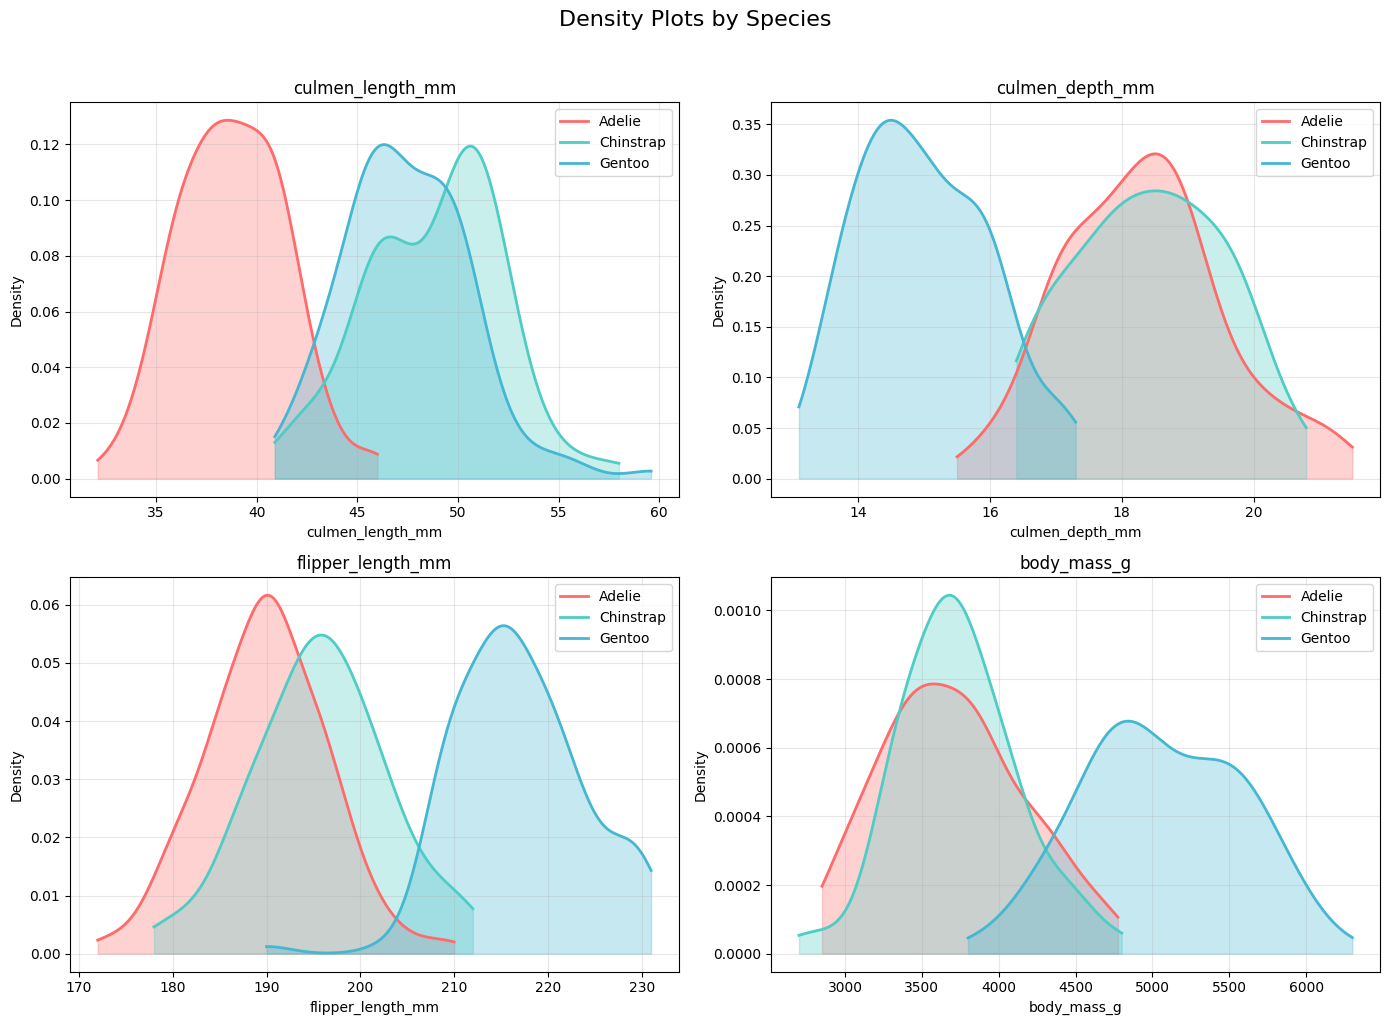

In [93]:
from scipy import stats

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Density Plots by Species', fontsize=16, y=1.02)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 2, idx % 2]
    
    for species_idx, species in enumerate(unique_species):
        species_data = penguins[penguins['species'] == species][col].dropna()
        
        # Calculate density
        density = stats.gaussian_kde(species_data)
        xs = np.linspace(species_data.min(), species_data.max(), 200)
        
        ax.plot(xs, density(xs), label=species, color=colors[species_idx], linewidth=2)
        ax.fill_between(xs, density(xs), alpha=0.3, color=colors[species_idx])
    
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.set_title(col)
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Summary: Key Findings
Let's create a summary of the most important findings:

In [94]:
print("=" * 80)
print("KEY FINDINGS SUMMARY")
print("=" * 80)

for col in numerical_cols:
    print(f"\n{col}:")
    print("-" * 80)
    
    # Overall statistics
    print(f"  Overall Mean: {penguins[col].mean():.2f}")
    print(f"  Overall Std Dev: {penguins[col].std():.2f}")
    print(f"  Range: [{penguins[col].min():.2f}, {penguins[col].max():.2f}]")
    
    # Species with highest and lowest mean
    species_means = penguins.groupby('species')[col].mean().sort_values()
    print(f"  Lowest mean: {species_means.index[0]} ({species_means.iloc[0]:.2f})")
    print(f"  Highest mean: {species_means.index[-1]} ({species_means.iloc[-1]:.2f})")
    
    # Outliers
    outliers, _, _ = detect_outliers_iqr(penguins, col)
    print(f"  Total outliers (IQR method): {len(outliers)}")
    
    # Distribution shape
    skewness = penguins[col].skew()
    if abs(skewness) < 0.5:
        shape = "approximately symmetric"
    elif skewness > 0:
        shape = "right-skewed (positively skewed)"
    else:
        shape = "left-skewed (negatively skewed)"
    print(f"  Distribution shape: {shape} (skewness: {skewness:.2f})")

print("\n" + "=" * 80)

KEY FINDINGS SUMMARY

culmen_length_mm:
--------------------------------------------------------------------------------
  Overall Mean: 43.91
  Overall Std Dev: 5.45
  Range: [32.10, 59.60]
  Lowest mean: Adelie (38.81)
  Highest mean: Chinstrap (48.83)
  Total outliers (IQR method): 0
  Distribution shape: approximately symmetric (skewness: 0.06)

culmen_depth_mm:
--------------------------------------------------------------------------------
  Overall Mean: 17.15
  Overall Std Dev: 1.97
  Range: [13.10, 21.50]
  Lowest mean: Gentoo (15.00)
  Highest mean: Chinstrap (18.42)
  Total outliers (IQR method): 0
  Distribution shape: approximately symmetric (skewness: -0.14)

flipper_length_mm:
--------------------------------------------------------------------------------
  Overall Mean: 200.85
  Overall Std Dev: 14.05
  Range: [172.00, 231.00]
  Lowest mean: Adelie (189.95)
  Highest mean: Gentoo (216.97)
  Total outliers (IQR method): 0
  Distribution shape: approximately symmetric (s

----------------------------------------------------------------------
## ASSIGNMENT #1.5

----------------------------------------------------------------------